# Forecasting Time Series: Kolmogorov Arnold Network

-  with: Sktime

In [9]:
import sktime

sktime.__version__

'0.29.0'

In [1]:
from sktime.datasets import load_airline

from sktime.split import temporal_train_test_split
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from kan import KAN
import pandas as pd
import numpy as np


In [2]:
df = load_airline()
df

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

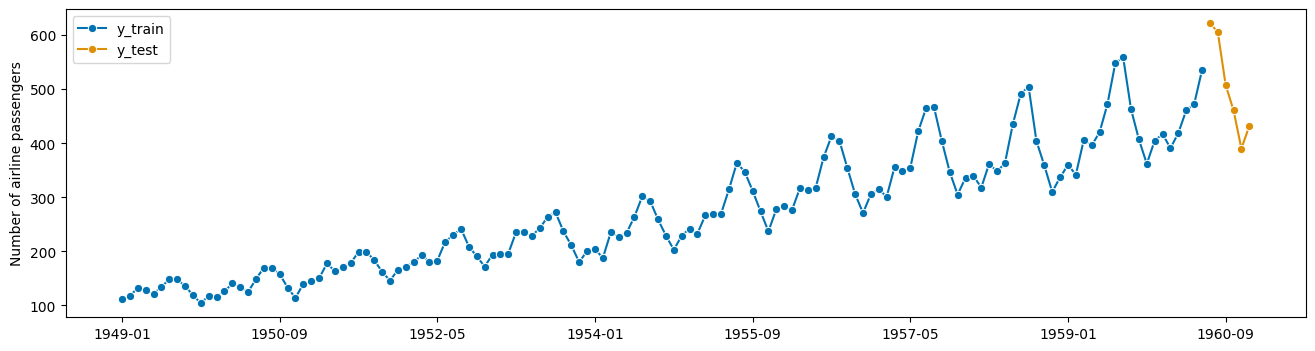

In [3]:
y_train, y_test = temporal_train_test_split(y = df, test_size=6)
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [4]:
#fh = ForecastingHorizon(y_test.index, is_relative=False)

# Building model

In [5]:
from sktime.forecasting.pykan_forecaster import PyKANForecaster
forecaster = PyKANForecaster(hidden_layers =[5,5], grids= [5,5])


## Training Model

In [6]:
forecaster.fit(y = df, fh = range(1, 24, 1) )

/Users/user/Documents/Documents/sktime/sktime/forecasting/base/_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/Users/user/Documents/Documents/sktime/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
train loss: 1.01e+01 | test loss: 3.81e+01 | reg: 1.05e+02 : 100%|█| 100/100 [01:22<00:00,  1.21it/s
train loss: 9.42e+00 | test loss: 3.76e+01 | reg: 1.28e+02 : 100%|█| 100/100 [01:20<00:00,  1.25it/s


PyKANForecaster(grids=[5, 5], hidden_layers=[5, 5])

# Forecasting Model

In [7]:
prediction = forecaster.predict( )
prediction

/Users/user/Documents/miniconda3/envs/myenv/lib/python3.10/site-packages/kan/KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1760.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))
/Users/user/Documents/Documents/sktime/sktime/forecasting/base/_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_from_self != freq_from_obj:
/Users/user/Documents/Documents/sktime/sktime/forecasting/base/_fh.py:172: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return to_offset(obj)
/Users/user/Documents/Documents/sktime/sktime/forecasting/base/_fh.py:415: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  if freq_fr

1961-01    426.610049
1961-02    462.119837
1961-03    488.239498
1961-04    516.665720
1961-05    570.865618
1961-06    642.885750
1961-07    689.154544
1961-08    667.507943
1961-09    589.362296
1961-10    490.797133
1961-11    437.962972
1961-12    442.678590
1962-01    454.025406
1962-02    490.149452
1962-03    525.089348
1962-04    561.964057
1962-05    634.210588
1962-06    726.513941
1962-07    789.997187
1962-08    767.675497
1962-09    680.495339
1962-10    565.218472
1962-11    501.479270
Freq: M, Name: Number of airline passengers, dtype: float64

# Plot Forecasting

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

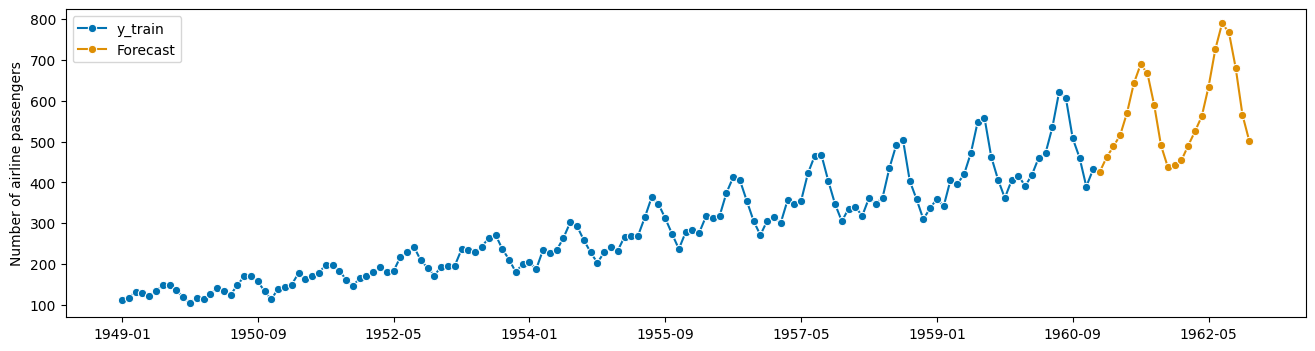

In [8]:
plot_series(df, prediction, labels=["y_train", "Forecast"])